In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies_metadata.csv', low_memory=False)

In [21]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [22]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


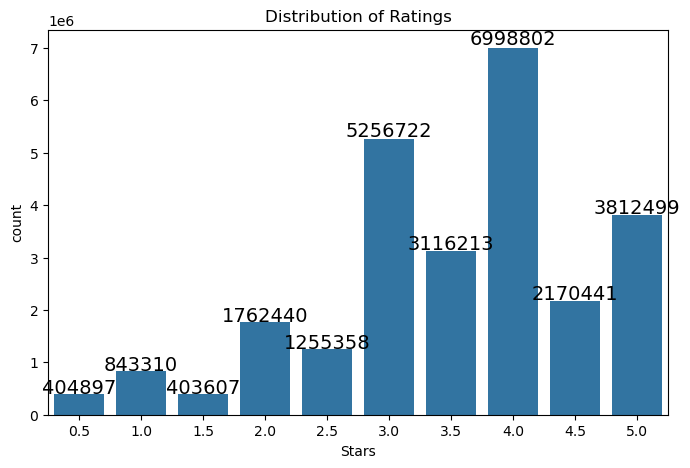

In [24]:
# Ratings Visualization

# Countplot for distribution of ratings
plt.figure(figsize=(8, 5))
stars = sns.countplot(data=ratings, x='rating', order=sorted(ratings['rating'].unique()))
labels = ratings['rating'].value_counts().sort_index()
plt.title('Distribution of Ratings')
plt.xlabel('Stars')

# Show number of labels per category
for i,n in enumerate(labels):
    stars.text(i, n + n * 0.01, str(n), horizontalalignment='center', size=14, color='black')
plt.show()

In [25]:
# Data Cleaning Process

# Remove records without a title

movies = movies.loc[movies['title'].isna() == False]

# Convert string datatype of id column of movies dataframe to int variable
movies = movies.astype({'id': 'int64'})

# Merge ratings and movies categories
df = pd.merge(ratings, movies[['id', 'title']], left_on='movieId', right_on='id')

# There are two id columns so we can remove one of them
df.drop(['timestamp', 'id'], axis=1, inplace=True)

# Drop duplicates
df = df.drop_duplicates(['userId','title'])

df.head()

,userId,movieId,rating,title
0,1,110,1.0,Three Colors: Red
1,1,147,4.5,The 400 Blows
2,1,858,5.0,Sleepless in Seattle
3,1,1246,5.0,Rocky Balboa
4,1,1968,4.0,Fools Rush In


In [27]:
# Convert ratings to 0 or 1 and make them int values
# Respahed data and determined if the user has watched the movie
#  
df_watched = df.pivot(index='userId', columns='title', values='rating').fillna(0)
df_watched = (df_watched >= 1).astype('int64')

df_watched.head()

title,!Women Art Revolution,"$1,000 on the Black",$5 a Day,'Gator Bait,'R Xmas,'Twas the Night Before Christmas,(A)Sexual,...And God Created Woman,...And the Pursuit of Happiness,00 Schneider - Jagd auf Nihil Baxter,...,¡A volar joven!,¡Three Amigos!,À nos amours,Åke and His World,Æon Flux,Ödipussi,Şaban Oğlu Şaban,Škola princů,Šíleně smutná princezna,Львиная доля
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from mlxtend.frequent_patterns import apriori

# Implement apriori algorithm and determine support values
df_watched = df_watched.astype(bool)
frequency_support = apriori(df_watched, min_support=0.1, use_colnames=True)

In [29]:
frequency_support.head()

,support,itemsets
0,0.215342,(48 Hrs.)
1,0.210645,(5 Card Stud)
2,0.170128,(A Nightmare on Elm Street)
3,0.128909,(A River Runs Through It)
4,0.156917,(All the Way Boys)


In [30]:
from mlxtend.frequent_patterns import association_rules

# Implemented association rules to calculate confidence and lift

rules = association_rules(frequency_support, metric="lift", min_threshold=1)

In [31]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(48 Hrs.),(A Nightmare on Elm Street),0.215342,0.170128,0.108714,0.504846,2.967444,1.0,0.072079,1.675987,0.844966,0.392817,0.403337,0.571930
1,(A Nightmare on Elm Street),(48 Hrs.),0.170128,0.215342,0.108714,0.639014,2.967444,1.0,0.072079,2.173654,0.798930,0.392817,0.539945,0.571930
2,(48 Hrs.),(Back to the Future Part II),0.215342,0.151408,0.106977,0.496778,3.281052,1.0,0.074373,1.686317,0.886016,0.411810,0.406992,0.601663
3,(Back to the Future Part II),(48 Hrs.),0.151408,0.215342,0.106977,0.706547,3.281052,1.0,0.074373,2.673882,0.819263,0.411810,0.626012,0.601663
4,(48 Hrs.),"(Bang, Boom, Bang)",0.215342,0.164935,0.113539,0.527251,3.196724,1.0,0.078022,1.766404,0.875769,0.425659,0.433878,0.607820


In [ ]:
# Sort user recommendations by descending values
df_recommendation = rules.sort_values(by=['lift'], ascending=False)
df_recommendation.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
104,(Syriana),"(Bang, Boom, Bang)",0.135287,0.164935,0.104175,0.770035,4.668719,1.0,0.081862,3.631266,0.908750,0.531382,0.724614,0.700825
105,"(Bang, Boom, Bang)",(Syriana),0.164935,0.135287,0.104175,0.631615,4.668719,1.0,0.081862,2.347309,0.941015,0.531382,0.573980,0.700825
628,"(Terminator 3: Rise of the Machines, The Conve...",(Lost in Translation),0.153924,0.141510,0.100719,0.654345,4.624010,1.0,0.078938,2.483661,0.926320,0.517266,0.597369,0.683046
633,(Lost in Translation),"(Terminator 3: Rise of the Machines, The Conve...",0.141510,0.153924,0.100719,0.711746,4.624010,1.0,0.078938,2.935175,0.912926,0.517266,0.659305,0.683046
632,(The Conversation),"(Terminator 3: Rise of the Machines, Lost in T...",0.201352,0.110339,0.100719,0.500215,4.533438,1.0,0.078502,1.780087,0.975921,0.477407,0.438230,0.706517


In [33]:
df_test = df_recommendation[df_recommendation['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'Terminator 3: Rise of the Machines')]

In [34]:
df_test.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
253,(Terminator 3: Rise of the Machines),(Point Break),0.328802,0.131477,0.115483,0.351225,2.671377,1.0,0.072253,1.338712,0.932156,0.334933,0.253013,0.614789
1100,(Terminator 3: Rise of the Machines),"(The Million Dollar Hotel, Sissi, Solaris)",0.328802,0.116258,0.100701,0.306265,2.634357,1.0,0.062475,1.273890,0.924318,0.292429,0.215003,0.586223
649,(Terminator 3: Rise of the Machines),"(The Million Dollar Hotel, Men in Black II)",0.328802,0.124257,0.107379,0.326578,2.628248,1.0,0.066523,1.300437,0.923004,0.310633,0.231028,0.595375
1033,(Terminator 3: Rise of the Machines),"(The Conversation, The Million Dollar Hotel)",0.328802,0.126148,0.108782,0.330844,2.622656,1.0,0.067304,1.305901,0.921795,0.314246,0.234245,0.596589
637,(Terminator 3: Rise of the Machines),"(Men in Black II, Solaris)",0.328802,0.129916,0.111832,0.340119,2.617985,1.0,0.069115,1.318547,0.920782,0.322388,0.241589,0.600459


In [35]:
movies = df_test['consequents'].values

movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

In [36]:
movie_list[0:10]

['Point Break',
 'The Million Dollar Hotel',
 'Sissi',
 'Solaris',
 'Men in Black II',
 'The Conversation',
 'Three Colors: Red',
 'Rain Man',
 'Monsoon Wedding',
 'A Nightmare on Elm Street']